In [921]:
import pandas as pd
#                                                                STEP # 1
#                                                 DATA COLLECTION AND PRE PROCESSING



In [923]:
import pandas as pd
ecommerce_df = pd.read_csv('ecommerce.csv')
file_2_df = pd.read_csv('ecommerce_1.csv')
file_1_df = pd.read_csv('ecommerce_2.csv')
combined_df = pd.concat([ecommerce_df, file_2_df, file_1_df], axis=1)

combined_df.to_csv('DATAAA.csv', index=False)

#     UNDERSTANDING THE NATURE OF DATA 
df = pd.read_csv('DATAAA.csv', low_memory=False)
df.head()


,order_id,customer_unique_id,market_share_product,customer_state,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_state,order_item_id,product_id,...,year,month,ref_num,Gender,age,SSN,Phone No.,State,Zip,Discount_Percent
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Oct,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Oct,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Oct,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.0
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Oct,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.0
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Nov,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.0


In [1197]:
#                                               REMOVING DUPLICATES

df = df.drop_duplicates()
#                                               CHECKING NULL VALUES
df.isnull().sum()
#                                               GETTING INFO ABOUT COLUMNS & PRINTING
df.describe()
print(df.columns)


Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_state_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'TransactionDate1', 'Quantity', 'CustomerAge',
       'Location', 'Is_Declined', 'Is_Fraud', 'AccountAgeDays', 'Latitude',
       'Longitude', 'TransactionHour', 'order_id.1', 'status', 'item_id',
       'sku', 'qty_ordered', '

In [929]:
#                    CHECKING FOR DUPLICATE PRODUCT IDs, (as doubted manually) :)
duplicate_products = df[df.duplicated(subset='product_id', keep=False)]
print("Duplicate product_id entries:\n", duplicate_products)

#                    CHECKING FOR DUPLICATES SELLER IDs  (as doubted manually) :)
duplicate_sellers = df[df.duplicated(subset='seller_id', keep=False)]
print("Duplicate seller_id entries:\n", duplicate_sellers)


Duplicate product_id entries:
                                  order_id                customer_unique_id  \
0        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
4        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
...                                   ...                               ...   
1040795                               NaN                               NaN   
1040796                               NaN                               NaN   
1040797                               NaN                               NaN   
1040798                               NaN                               NaN   
1040799                               NaN                               NaN   

         market_shar

In [931]:
#  DUPLICATES FOUND, REMOVIN THE REST AFTER FIRST ONES
df = df.drop_duplicates(subset='product_id', keep='first')

#  DUPLICATES FOUND, REMOVING THE REST AFTER FIRST ONES, ROW BASEDD
df = df.drop_duplicates(subset='seller_id', keep='first')


df = df.drop_duplicates(subset=['product_id', 'seller_id'], keep='first')


#  ENSURING UNIQUENESS

unique_products = df['product_id'].is_unique
print(f"Are product_ids unique? {unique_products}")

unique_sellers = df['seller_id'].is_unique
print(f"Are seller_ids unique? {unique_sellers}")

df.head(5)



Are product_ids unique? True
Are seller_ids unique? True


,order_id,customer_unique_id,market_share_product,customer_state,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_state,order_item_id,product_id,...,year,month,ref_num,Gender,age,SSN,Phone No.,State,Zip,Discount_Percent
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,0.001732,SP,3149.0,-23.574809,-46.587471,SP,1.0,87285b34884572647811a353c7ac498a,...,2020.0,20-Oct,987867.0,F,43.0,627-31-5251,405-959-1129,OK,73571.0,0.00000
14904,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,0.039531,BA,47813.0,-12.169860,-44.988369,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2020.0,20-Oct,841950.0,F,43.0,153-23-5364,216-666-1011,OH,43072.0,12.70648
16253,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,0.006856,GO,75265.0,-16.746337,-48.514624,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,2021.0,21-Sep,964852.0,F,31.0,187-86-0281,802-964-9945,VT,5777.0,0.00000
20503,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,0.001112,RN,59296.0,-5.767733,-35.275467,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2020.0,20-Nov,805628.0,M,45.0,691-18-2163,216-894-7962,OH,44867.0,20.00000
22213,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,0.002689,SP,9195.0,-23.675037,-46.524784,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2020.0,20-Nov,974015.0,F,61.0,286-15-6810,205-294-7351,AL,36548.0,0.00000


In [933]:
#                                                     CHECKING FOR THE MISSING VALUES
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


order_id                        1
customer_unique_id              1
market_share_product            1
customer_state                  1
zip_code_prefix                 1
geolocation_lat                 1
geolocation_lng                 1
geolocation_state               1
order_item_id                   1
product_id                      1
seller_id                       1
price                           1
freight_value                   1
payment_sequential              1
payment_installments            1
payment_value                   1
review_id                       2
review_score                    2
review_comment_title           44
seller_zip_code_prefix          1
seller_city                     1
seller_state                    1
geolocation_zip_code_prefix     1
geolocation_lat_seller          1
geolocation_lng_seller          1
geolocation_state_seller        1
product_name_lenght             2
product_description_lenght      2
product_photos_qty              2
product_weight

In [939]:
#      NUMERIC COLUMNS FILLING BY MEAN
numeric_columns = [
    'price', 'freight_value', 'payment_value', 'payment_installments', 
    'product_weight_g', 'product_length_cm', 'product_height_cm', 
    'product_width_cm', 'product_name_lenght', 'product_description_lenght', 
    'product_photos_qty'
]

for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print(df.columns)

#  CATEGORICAK COLUMNS FILLING WITH UNKNOWN
categorical_columns = [
    'seller_city', 'order_item_id', 'item_id', 'sku', 'order_id.1', 'status',
    'Phone No. ', 'ref_num', 'Gender', 'State', 'Zip'
]
for column in categorical_columns:
    df[column] = df[column].fillna('unknown')


# AGAIN CHECKING MISSING VALUES

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# FILLING WITH MEAN MODE 

df['market_share_product'] = df['market_share_product'].fillna(df['market_share_product'].mean())
df['zip_code_prefix'] = df['zip_code_prefix'].fillna(df['zip_code_prefix'].mode()[0])
df['payment_sequential'] = df['payment_sequential'].fillna(df['payment_sequential'].mean())
df['review_score'] = df['review_score'].fillna(df['review_score'].mean())
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].fillna(df['seller_zip_code_prefix'].mode()[0])
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].fillna(df['geolocation_zip_code_prefix'].mode()[0])

df['qty_ordered'] = df['qty_ordered'].fillna(df['qty_ordered'].mean())
df['value'] = df['value'].fillna(df['value'].mean())
df['discount_amount'] = df['discount_amount'].fillna(df['discount_amount'].mean())
df['total'] = df['total'].fillna(df['total'].mean())
df['cust_id'] = df['cust_id'].fillna('unknown')
df['year'] = df['year'].fillna(df['year'].mode()[0])
df['month'] = df['month'].fillna(df['month'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mean())
df['Discount_Percent'] = df['Discount_Percent'].fillna(df['Discount_Percent'].mean())

# AGAIN CHECKING ANY LEFT OVER MISSING VALUES
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



order_id                     1
customer_unique_id           1
customer_state               1
geolocation_lat              1
geolocation_lng              1
geolocation_state            1
product_id                   1
seller_id                    1
review_id                    2
review_comment_title        44
seller_state                 1
geolocation_lat_seller       1
geolocation_lng_seller       1
geolocation_state_seller     1
SSN                         39
dtype: int64
Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation

In [943]:
# NO MISSING VALUES FOUND, ENSURING

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

import matplotlib.pyplot as plt
import seaborn as sns

df['order_id'] = df['order_id'].fillna(df['order_id'].mode()[0])
df['customer_unique_id'] = df['customer_unique_id'].fillna(df['customer_unique_id'].mode()[0])
df['customer_state'] = df['customer_state'].fillna(df['customer_state'].mode()[0])
df['geolocation_lat'] = df['geolocation_lat'].fillna(df['geolocation_lat'].mean())
df['geolocation_lng'] = df['geolocation_lng'].fillna(df['geolocation_lng'].mean())
df['geolocation_state'] = df['geolocation_state'].fillna(df['geolocation_state'].mode()[0])
df['product_id'] = df['product_id'].fillna(df['product_id'].mode()[0])
df['seller_id'] = df['seller_id'].fillna(df['seller_id'].mode()[0])
df['review_id'] = df['review_id'].fillna(df['review_id'].mode()[0])
df['review_comment_title'] = df['review_comment_title'].fillna('no_comment')
df['seller_state'] = df['seller_state'].fillna(df['seller_state'].mode()[0])
df['geolocation_lat_seller'] = df['geolocation_lat_seller'].fillna(df['geolocation_lat_seller'].mean())
df['geolocation_lng_seller'] = df['geolocation_lng_seller'].fillna(df['geolocation_lng_seller'].mean())
df['geolocation_state_seller'] = df['geolocation_state_seller'].fillna(df['geolocation_state_seller'].mode()[0])
df['SSN'] = df['SSN'].fillna('unknown')



Series([], dtype: int64)


In [945]:
import pandas as pd

df.dtypes


order_id                 object
customer_unique_id       object
market_share_product    float64
customer_state           object
zip_code_prefix         float64
                         ...   
SSN                      object
Phone No.                object
State                    object
Zip                      object
Discount_Percent        float64
Length: 65, dtype: object

In [947]:

# CHECKING FOR NUMERICAK COLUMNS

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(numerical_cols)


Index(['market_share_product', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'seller_zip_code_prefix', 'geolocation_zip_code_prefix',
       'geolocation_lat_seller', 'geolocation_lng_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'Quantity', 'CustomerAge', 'Is_Declined',
       'Is_Fraud', 'AccountAgeDays', 'Latitude', 'Longitude',
       'TransactionHour', 'qty_ordered', 'value', 'discount_amount', 'total',
       'year', 'age', 'Discount_Percent'],
      dtype='object')


In [959]:
import pandas as pd
import numpy as np


numeric_columns = ['market_share_product', 'zip_code_prefix', 'geolocation_lat',
                   'geolocation_lng', 'price', 'freight_value', 'payment_sequential',
                   'payment_installments', 'payment_value', 'review_score',
                   'seller_zip_code_prefix', 'geolocation_zip_code_prefix',
                   'geolocation_lat_seller', 'geolocation_lng_seller',
                   'product_name_lenght', 'product_description_lenght',
                   'product_photos_qty', 'product_weight_g', 'product_length_cm',
                   'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
                   'TransactionAmount', 'Quantity', 'CustomerAge', 'Is_Declined',
                   'Is_Fraud', 'AccountAgeDays', 'Latitude', 'Longitude',
                   'TransactionHour', 'qty_ordered', 'value', 'discount_amount', 'total',
                   'year', 'age', 'Discount_Percent']

# CHECKING FOR OUTLIERS

for col in numeric_columns:
   
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
   
    df.loc[outliers, col] = np.nan


# SETTING THEM TO NAN 


In [961]:
df.head
# CHECKING IF THE DATA IS CONSISTENT OR NO DATA LOSS

<bound method NDFrame.head of                                  order_id                customer_unique_id  \
0        e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
14904    53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
16253    47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
20503    949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
22213    ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
32647    a4591c265e18cb1dcee52889e2d8acc3  80bb27c7c16e8f973207a5086ab329e2   
33637    136cce7faa42fdb2cefd53fdc79a6098  36edbb3fb164b1f16485364b6fb04c73   
38551    6514b8ad8028c9f2cc2374ded245783f  932afa1e708222e5821dac9cd5db4cae   
79790    76c6e866289321a7c93b82b54852dc33  39382392765b6dc74812866ee5ee92a7   
81077    e69bfb5eb88e0ed6a785585b27e16dbf  299905e3934e9e181bfb2e164dd4b4f8   
123611   e6ce16cb79ec1d90b1da9085a6118aeb  f2a85dec752b8517b5e58a06ff3cd937   
154913   34513ce0c4fab

In [963]:
#CALCULTAING Z SCORES AND CHECKING IF ANY IS GREATER THAN 3
from scipy import stats
df.fillna(df.mean(numeric_only=True), inplace=True)

z_scores = np.abs(stats.zscore(df[numeric_columns].dropna(), nan_policy='omit'))

outliers_present = (z_scores > 3).any()
print(f"Outliers present: {outliers_present}")


Outliers present: market_share_product           False
zip_code_prefix                False
geolocation_lat                 True
geolocation_lng                False
price                          False
freight_value                  False
payment_sequential             False
payment_installments           False
payment_value                  False
review_score                    True
seller_zip_code_prefix         False
geolocation_zip_code_prefix    False
geolocation_lat_seller         False
geolocation_lng_seller         False
product_name_lenght            False
product_description_lenght     False
product_photos_qty             False
product_weight_g               False
product_length_cm              False
product_height_cm               True
product_width_cm               False
TransactionID                  False
UserID                         False
TransactionAmount              False
Quantity                       False
CustomerAge                    False
Is_Declined         

In [965]:
# STANDARDIZATION AND NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['market_share_product', 'zip_code_prefix', 'geolocation_lat',
                   'geolocation_lng', 'price', 'freight_value', 'payment_sequential',
                   'payment_installments', 'payment_value', 'review_score',
                   'seller_zip_code_prefix', 'geolocation_zip_code_prefix',
                   'geolocation_lat_seller', 'geolocation_lng_seller',
                   'product_name_lenght', 'product_description_lenght',
                   'product_photos_qty', 'product_weight_g', 'product_length_cm',
                   'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
                   'TransactionAmount', 'Quantity', 'CustomerAge', 'Is_Declined',
                   'Is_Fraud', 'AccountAgeDays', 'Latitude', 'Longitude',
                   'TransactionHour', 'qty_ordered', 'value', 'discount_amount', 'total',
                   'year', 'age', 'Discount_Percent']

scaler = MinMaxScaler()


df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df[numeric_columns].head())


       market_share_product  zip_code_prefix  geolocation_lat  \
0                 -0.875787        -1.130212    -3.988087e-01   
14904              1.400960         0.311159    -1.047443e-15   
16253             -0.567165         1.197074     3.455328e+00   
20503             -0.913133         0.681731     9.413158e-01   
22213             -0.818120        -0.935099    -4.553796e-01   

       geolocation_lng     price  freight_value  payment_sequential  \
0             0.071368 -0.988647      -1.645610                 0.0   
14904         0.917241  0.934289       1.429357                 0.0   
16253        -0.948034  1.827368       0.654045                 0.0   
20503         0.129347 -0.663281       2.401782                 0.0   
22213         0.104527 -1.207365      -1.645610                 0.0   

       payment_installments  payment_value  review_score  ...  Latitude  \
0                 -0.683374      -1.418649     -1.164001  ... -0.048419   
14904             -0.683374     

In [967]:
df.head()

,order_id,customer_unique_id,market_share_product,customer_state,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_state,order_item_id,product_id,...,year,month,ref_num,Gender,age,SSN,Phone No.,State,Zip,Discount_Percent
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,-0.875787,SP,-1.130212,-3.988087e-01,0.071368,SP,1.0,87285b34884572647811a353c7ac498a,...,0.0,20-Oct,987867.0,F,1.612452,627-31-5251,405-959-1129,OK,73571.0,-1.612452
14904,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,1.400960,BA,0.311159,-1.047443e-15,0.917241,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,0.0,20-Oct,841950.0,F,1.612452,153-23-5364,216-666-1011,OH,43072.0,-1.612452
16253,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,-0.567165,GO,1.197074,3.455328e+00,-0.948034,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,0.0,21-Sep,964852.0,F,1.612452,187-86-0281,802-964-9945,VT,5777.0,-1.612452
20503,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,-0.913133,RN,0.681731,9.413158e-01,0.129347,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,0.0,20-Nov,805628.0,M,1.612452,691-18-2163,216-894-7962,OH,44867.0,-1.612452
22213,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,-0.818120,SP,-0.935099,-4.553796e-01,0.104527,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,0.0,20-Nov,974015.0,F,1.612452,286-15-6810,205-294-7351,AL,36548.0,-1.612452


In [969]:
df.columns


Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_state_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'TransactionDate1', 'Quantity', 'CustomerAge',
       'Location', 'Is_Declined', 'Is_Fraud', 'AccountAgeDays', 'Latitude',
       'Longitude', 'TransactionHour', 'order_id.1', 'status', 'item_id',
      

In [973]:
# CHECK FOR CATEGORICAL VARIABLES
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['order_id', 'customer_unique_id', 'customer_state', 'geolocation_state',
       'order_item_id', 'product_id', 'seller_id', 'review_id',
       'review_comment_title', 'seller_city', 'seller_state',
       'geolocation_state_seller', 'TransactionDate1', 'Location',
       'order_id.1', 'status', 'item_id', 'sku', 'cust_id', 'month', 'ref_num',
       'Gender', 'SSN', 'Phone No. ', 'State', 'Zip'],
      dtype='object')


In [981]:

df = df.drop(columns=['review_comment_title'], errors='ignore')


In [985]:
df.columns

Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_state_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'TransactionDate1', 'Quantity', 'CustomerAge',
       'Location', 'Is_Declined', 'Is_Fraud', 'AccountAgeDays', 'Latitude',
       'Longitude', 'TransactionHour', 'order_id.1', 'status', 'item_id',
       'sku', 'qty_ordered', '

In [1011]:
categorical_columns = [
    'order_id', 'customer_unique_id', 'customer_state', 'geolocation_state',
       'order_item_id', 'product_id', 'seller_id', 'review_id', 'seller_city', 'seller_state',
       'geolocation_state_seller', 'TransactionDate1', 'Location',
       'order_id.1', 'status', 'item_id', 'sku', 'cust_id', 'month', 'ref_num',
       'Gender', 'SSN', 'Phone No. ', 'State', 'Zip'
]

# APPLY ONE HOT ENCODING 
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print(df_encoded.head())

df.dtypes.count()


       market_share_product  zip_code_prefix  geolocation_lat  \
0                 -0.875787        -1.130212    -3.988087e-01   
14904              1.400960         0.311159    -1.047443e-15   
16253             -0.567165         1.197074     3.455328e+00   
20503             -0.913133         0.681731     9.413158e-01   
22213             -0.818120        -0.935099    -4.553796e-01   

       geolocation_lng     price  freight_value  payment_sequential  \
0             0.071368 -0.988647      -1.645610                 0.0   
14904         0.917241  0.934289       1.429357                 0.0   
16253        -0.948034  1.827368       0.654045                 0.0   
20503         0.129347 -0.663281       2.401782                 0.0   
22213         0.104527 -1.207365      -1.645610                 0.0   

       payment_installments  payment_value  review_score  ...  Zip_44867.0  \
0                 -0.683374      -1.418649     -1.164001  ...        False   
14904             -0.68337

64

In [1023]:

print(df_encoded.head())

df.head()
df.columns

       market_share_product  zip_code_prefix  geolocation_lat  \
0                 -0.875787        -1.130212    -3.988087e-01   
14904              1.400960         0.311159    -1.047443e-15   
16253             -0.567165         1.197074     3.455328e+00   
20503             -0.913133         0.681731     9.413158e-01   
22213             -0.818120        -0.935099    -4.553796e-01   

       geolocation_lng     price  freight_value  payment_sequential  \
0             0.071368 -0.988647      -1.645610                 0.0   
14904         0.917241  0.934289       1.429357                 0.0   
16253        -0.948034  1.827368       0.654045                 0.0   
20503         0.129347 -0.663281       2.401782                 0.0   
22213         0.104527 -1.207365      -1.645610                 0.0   

       payment_installments  payment_value  review_score  ...  Zip_44867.0  \
0                 -0.683374      -1.418649     -1.164001  ...        False   
14904             -0.68337

Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_state_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'TransactionDate1', 'Quantity', 'CustomerAge',
       'Location', 'Is_Declined', 'Is_Fraud', 'AccountAgeDays', 'Latitude',
       'Longitude', 'TransactionHour', 'order_id.1', 'status', 'item_id',
       'sku', 'qty_ordered', '

In [1031]:
# ADDING TWO FEATURE COLUMNS

# TOTAL SALES PER TRANSACTION
df['total_sales_per_transaction'] = df.groupby('TransactionID')['price'].transform('sum') + df.groupby('TransactionID')['freight_value'].transform('sum')

# AVERAGE TRANSACTION VALUE
df['average_transaction_value'] = df['total_sales_per_transaction'] / df.groupby('TransactionID')['TransactionID'].transform('count')


In [1037]:
df.columns


Index(['order_id', 'customer_unique_id', 'market_share_product',
       'customer_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_state_seller',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'TransactionID', 'UserID',
       'TransactionAmount', 'TransactionDate1', 'Quantity', 'CustomerAge',
       'Location', 'Is_Declined', 'Is_Fraud', 'AccountAgeDays', 'Latitude',
       'Longitude', 'TransactionHour', 'order_id.1', 'status', 'item_id',
       'sku', 'qty_ordered', '

In [1043]:
import pandas as pd
# CHECKING UNIQUE VALUES
print(df['Location'].unique())

# LOCATION COLUMN WAS LEFT FOR ENCODING
df_encoded = pd.get_dummies(df, columns=['Location'])

print(df_encoded.head())



['Oklahoma City' 'Los Angeles' 'Jacksonville' 'San Diego' 'San Antonio'
 'San Jose' 'Phoenix' 'Indianapolis' 'Chicago' 'Houston' 'Fort Worth'
 'Philadelphia' 'Dallas' 'San Francisco' 'Seattle' 'New York' 'Austin'
 'Detroit']
                               order_id                customer_unique_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
14904  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
16253  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
20503  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
22213  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   

       market_share_product customer_state  zip_code_prefix  geolocation_lat  \
0                 -0.875787             SP        -1.130212    -3.988087e-01   
14904              1.400960             BA         0.311159    -1.047443e-15   
16253             -0.567165             GO         1.197074     3.455328

In [1064]:
#STANDARDIZING AND NORMALIZING THE TWO NEW COLUMNS ADDED :D
df['total_sales_per_transaction'] = df.groupby('TransactionID')['price'].transform('sum') + df.groupby('TransactionID')['freight_value'].transform('sum')

df['average_transaction_value'] = df['total_sales_per_transaction'] / df.groupby('TransactionID')['TransactionID'].transform('count')

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df[['total_sales_per_transaction', 'average_transaction_value']] = standard_scaler.fit_transform(df[['total_sales_per_transaction', 'average_transaction_value']])

df[['total_sales_per_transaction', 'average_transaction_value']] = min_max_scaler.fit_transform(df[['total_sales_per_transaction', 'average_transaction_value']])

print(df[['TransactionID', 'total_sales_per_transaction', 'average_transaction_value']])

         TransactionID  total_sales_per_transaction  average_transaction_value
0            -1.587330                     0.089187                   0.089187
14904        -1.536971                     0.774925                   0.774925
16253        -1.532413                     0.791083                   0.791083
20503        -1.518053                     0.689152                   0.689152
22213        -1.512276                     0.059178                   0.059178
32647        -1.477021                     1.000000                   1.000000
33637        -1.473676                     0.368669                   0.368669
38551        -1.457072                     0.372234                   0.372234
79790        -1.317732                     0.279444                   0.279444
81077        -1.313384                     0.778137                   0.778137
123611       -1.169668                     0.520219                   0.520219
154913       -1.063904                     0.514129 

In [1081]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_columns]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


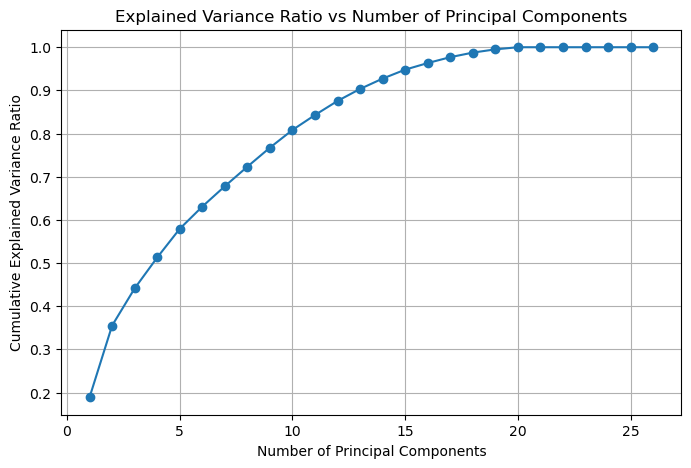

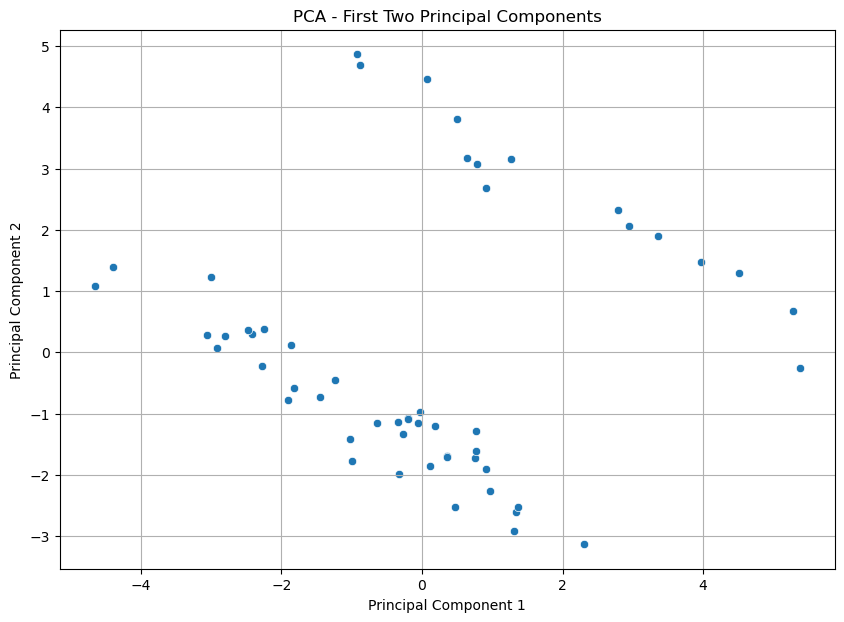

In [1153]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


numerical_features = ['price', 'freight_value', 'payment_sequential', 'payment_installments',
                       'payment_value', 'review_score', 'product_name_lenght',
                       'product_description_lenght', 'product_photos_qty',
                       'product_weight_g', 'product_length_cm', 'product_height_cm',
                       'product_width_cm', 'TransactionAmount', 'Quantity',
                       'CustomerAge', 'AccountAgeDays', 'Latitude', 'Longitude',
                       'TransactionHour', 'value', 'discount_amount', 'total',
                       'Discount_Percent', 'total_sales_per_transaction', 'average_transaction_value']


features = df[numerical_features]

# STANDARDIZING AND SCALING BEFORE APPLYING PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# FIT PCA TO STANDARDIZESD COLUMNS
pca = PCA()
pca.fit(features_scaled)

# TRANFORM ORIGINAL DATA TO PC SPACE
pca_transformed = pca.transform(features_scaled)
pca_df = pd.DataFrame(data=pca_transformed, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

#VISUALIZE TO DECIDE HOW MANY PC SHOULD BE RETAINED :)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# PLOTTING
# SHOWING THE EFFECT OF PC AND VARIANCE OF IT
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Principal Components')
plt.grid(True)
plt.show()

# SELECTING NO OF COMP TO REDUCE DATA AND MAKE SIMPLE
n_components = 2
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_transformed, columns=[f'PC{i+1}' for i in range(n_components)])

# PLOTTING BW BOTH TWO COMPONENETS 
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()


In [1147]:
average_purchase_value = df.groupby(['customer_unique_id'])['price'].mean()

# CALCULATING PURCHASE FRE PER CUSTOMER
purchase_frequency = df.groupby(['customer_unique_id'])['order_id'].count()

# ASSUMEING FOXED RETENTION RATE
retention_rate = 0.8  

# CLV FOR EACH CUSTOMER
clv = average_purchase_value * purchase_frequency * retention_rate

# CLV SERIES TO DF
clv_df = clv.reset_index()
clv_df.columns = ['customer_unique_id', 'Average_Purchase_Value']
clv_df['Purchase_Frequency'] = clv_df['customer_unique_id'].map(purchase_frequency)
clv_df['CLV'] = clv_df['Average_Purchase_Value'] * clv_df['Purchase_Frequency'] * retention_rate

# MERGING CLV DF TO ORIGINAL DATAAA.csv :D
df_with_clv = df.merge(clv_df[['customer_unique_id', 'CLV']], on='customer_unique_id')

# AGGREGATE CLV BY SEGMENT CUSTOMER STATE
clv_by_segment = df_with_clv.groupby('customer_state')['CLV'].mean()


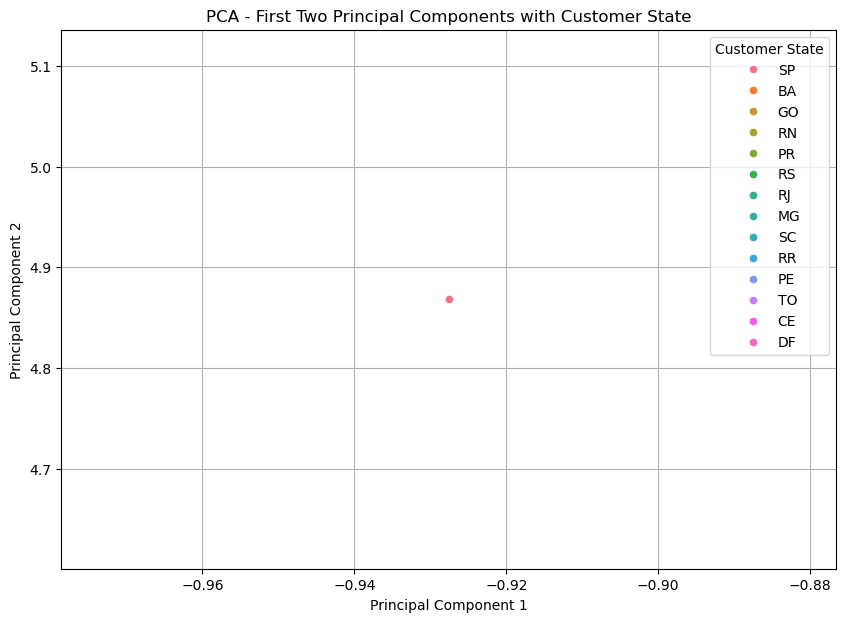

In [1200]:

# VIUSLAISING TWO PC WITH CUSTOMER STATES

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['customer_state'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components with Customer State')
plt.legend(title='Customer State')
plt.grid(True)
plt.show()




<Figure size 1200x600 with 0 Axes>

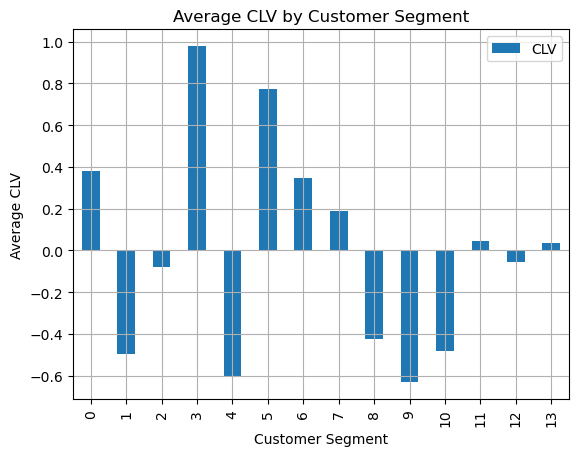

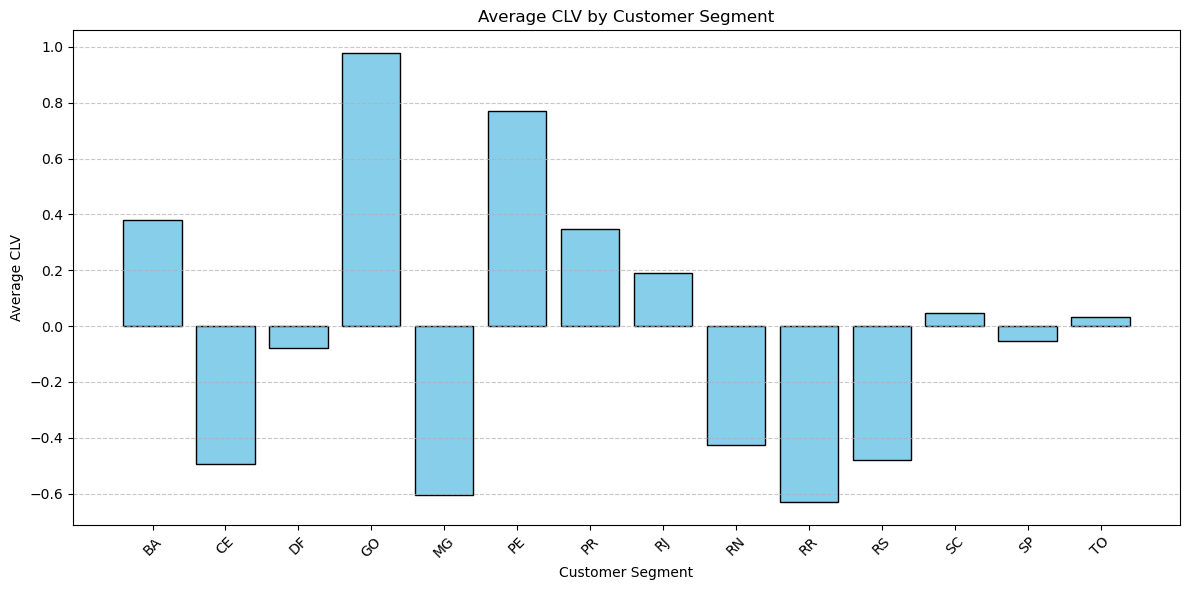

C:\Users\Dell\AppData\Local\Temp\ipykernel_31672\1382513359.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='CLV', data=clv_by_segment, palette='viridis')


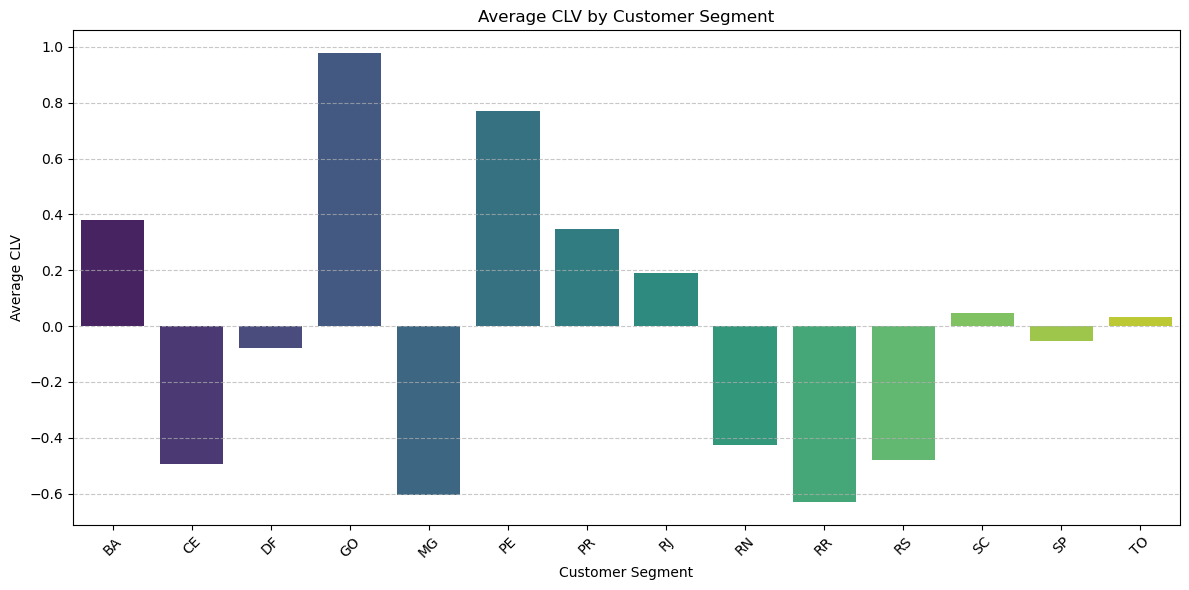

In [1187]:
import matplotlib.pyplot as plt

# BAR PLOTTING AVG CLV
plt.figure(figsize=(12, 6))
clv_by_segment.plot(kind='bar')
plt.title('Average CLV by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average CLV')
plt.grid(True)
plt.show()

clv_by_segment = df_with_clv.groupby('customer_state')['CLV'].mean().reset_index()

# PLOT AVG CLV BY CUSTOMER SEGMENTSSSSS
plt.figure(figsize=(12, 6))
plt.bar(clv_by_segment['customer_state'], clv_by_segment['CLV'], color='skyblue', edgecolor='black')
plt.title('Average CLV by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average CLV')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


# COMPUTE AVG CLV BY CUTSOMER SEGMENT
clv_by_segment = df_with_clv.groupby('customer_state')['CLV'].mean().reset_index()

# BAR PLOT WITH CLR 
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='CLV', data=clv_by_segment, palette='viridis')
plt.title('Average CLV by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average CLV')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


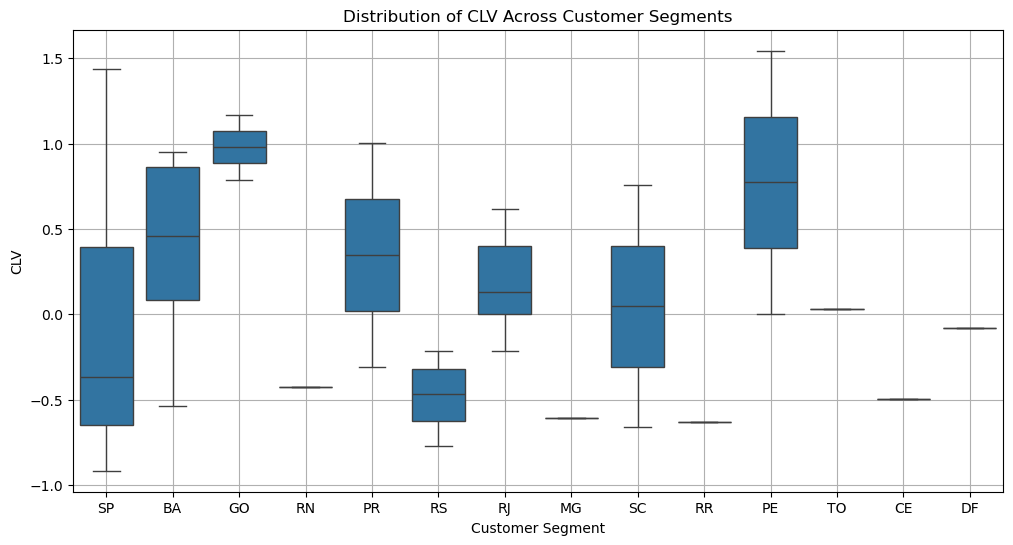

C:\Users\Dell\AppData\Local\Temp\ipykernel_31672\832967699.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_state', y='CLV', data=df_with_clv, palette='coolwarm', showfliers=False)


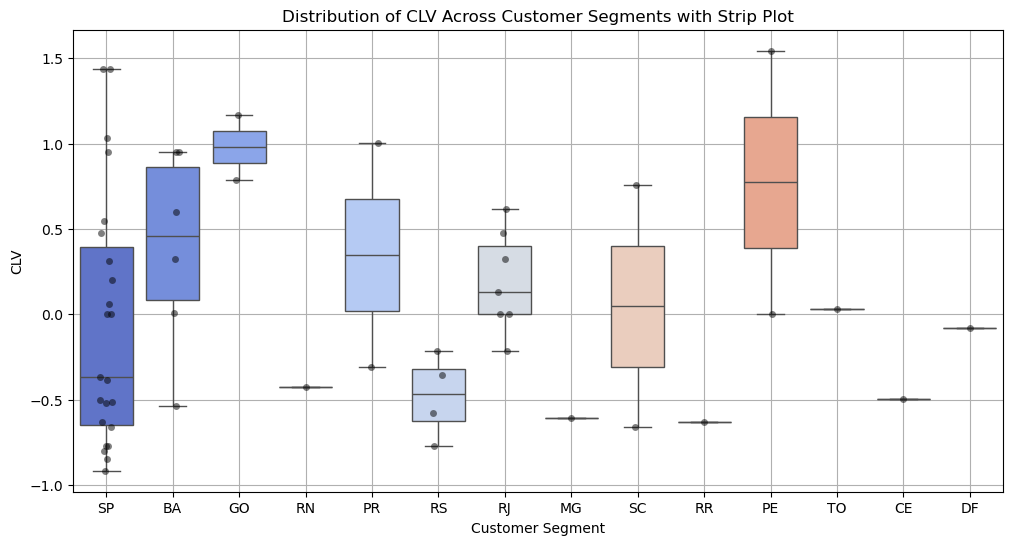

C:\Users\Dell\AppData\Local\Temp\ipykernel_31672\832967699.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='customer_state', y='CLV', data=df_with_clv, palette='coolwarm', alpha=0.6)


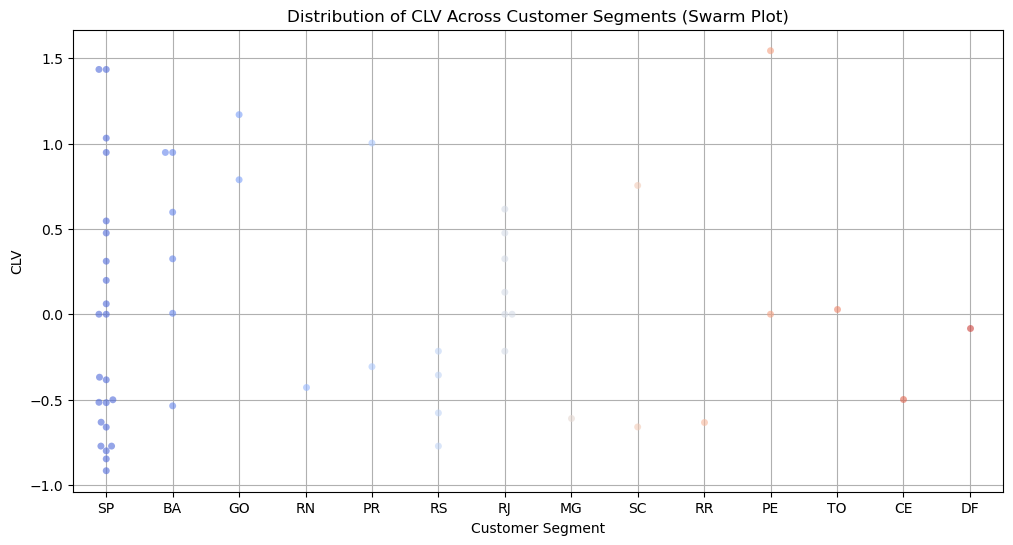

In [1183]:
import seaborn as sns

# BOX PLOT OF CLV 
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='CLV', data=df_with_clv)
plt.title('Distribution of CLV Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('CLV')
plt.grid(True)
plt.show()
# STRIP PLPOT
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='CLV', data=df_with_clv, palette='coolwarm', showfliers=False)
sns.stripplot(x='customer_state', y='CLV', data=df_with_clv, color='k', alpha=0.5, jitter=True)
plt.title('Distribution of CLV Across Customer Segments with Strip Plot')
plt.xlabel('Customer Segment')
plt.ylabel('CLV')
plt.grid(True)
plt.show()

#SWARM PLOT
plt.figure(figsize=(12, 6))
sns.swarmplot(x='customer_state', y='CLV', data=df_with_clv, palette='coolwarm', alpha=0.6)
plt.title('Distribution of CLV Across Customer Segments (Swarm Plot)')
plt.xlabel('Customer Segment')
plt.ylabel('CLV')
plt.grid(True)
plt.show()



   Increase  Average CLV
0  0.000000     2.339762
1  0.055556     2.469749
2  0.111111     2.599735
3  0.166667     2.729722
4  0.222222     2.859709
5  0.277778     2.989696
6  0.333333     3.119683
7  0.388889     3.249669
8  0.444444     3.379656
9  0.500000     3.509643


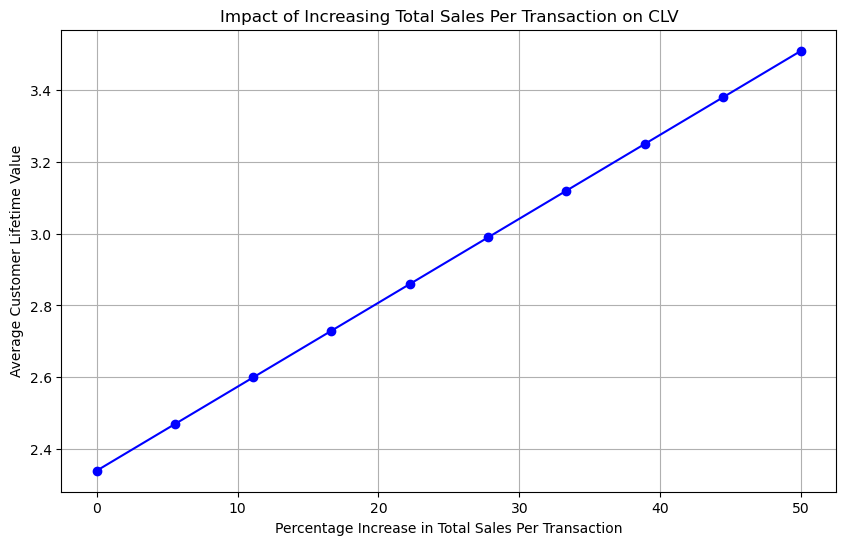

In [1161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['TransactionDate1'] = pd.to_datetime(df['TransactionDate1'], format='%d-%b', errors='coerce')


# PERCENTAGE INC FOR WHAT IS ANALYSIS
percentage_increases = np.linspace(0, 0.5, 10)  # From 0% to 50%
results = []

for increase in percentage_increases:
    # CREATE NEW COL WITH ADJ total_sales
    df['adjusted_total_sales'] = df['total_sales_per_transaction'] * (1 + increase)
    
    # RECALCUKATE THE AVG SALES WITH UNIQU IDs
    avg_purchase_value = df.groupby('customer_unique_id')['adjusted_total_sales'].mean()
    purchase_frequency = df.groupby('customer_unique_id').size()
    
  
    customer_lifespan = df.groupby('customer_unique_id')['TransactionDate1'].agg(['min', 'max'])
    customer_lifespan['lifespan_days'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days
    
  # STATIC RETENTION RATE
    retention_rate = 0.80
    
    # CALCULATE CLV
    clv = (avg_purchase_value * purchase_frequency) / (1 - retention_rate)
    
    avg_clv = clv.mean()
    results.append({'Increase': increase, 'Average CLV': avg_clv})

# RESULTS BACK TO DF
results_df = pd.DataFrame(results)
print(results_df)

# PLOTTING
plt.figure(figsize=(10, 6))
plt.plot(results_df['Increase'] * 100, results_df['Average CLV'], marker='o', linestyle='-', color='b')
plt.xlabel('Percentage Increase in Total Sales Per Transaction')
plt.ylabel('Average Customer Lifetime Value')
plt.title('Impact of Increasing Total Sales Per Transaction on CLV')
plt.grid(True)
plt.show()


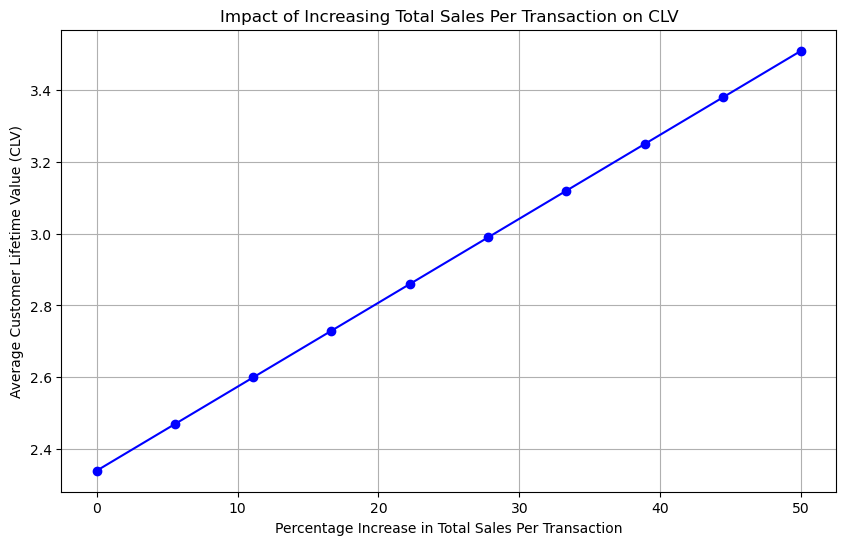

In [1202]:
# PLOT

plt.figure(figsize=(10, 6))
plt.plot(results_df['Increase'] * 100, results_df['Average CLV'], marker='o', linestyle='-', color='b')
plt.xlabel('Percentage Increase in Total Sales Per Transaction')
plt.ylabel('Average Customer Lifetime Value (CLV)')
plt.title('Impact of Increasing Total Sales Per Transaction on CLV')
plt.grid(True)
plt.show()

In [1171]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# CHECKING EXPLAINED VARIANCE TOUNDERSTAND HOW MUCHODF DATA VAIRBAILTY IS CAPTURED

numerical_features = ['price', 'freight_value', 'payment_sequential', 'payment_installments',
                      'payment_value', 'review_score', 'product_name_lenght',
                      'product_description_lenght', 'product_photos_qty',
                      'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'TransactionAmount', 'Quantity',
                      'CustomerAge', 'AccountAgeDays', 'Latitude', 'Longitude',
                      'TransactionHour', 'value', 'discount_amount', 'total',
                      'Discount_Percent', 'total_sales_per_transaction', 'average_transaction_value']


features = df[numerical_features]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=2) 
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_with_pca = df.copy()
df_with_pca['PC1'] = pca_df['PC1']
df_with_pca['PC2'] = pca_df['PC2']


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)



Explained variance ratio: [0.18914369 0.16605733]


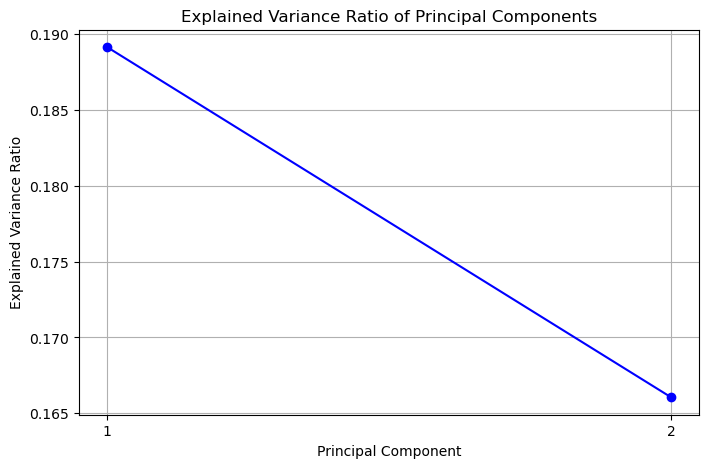

In [1179]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', color='b')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()
